# Exploratory Data Analysis (EDA) - Sierra Leone (Bumbuna) Solar Data
#
# **Objective:** Profile, clean, and explore Sierra Leone's (Bumbuna) solar dataset to understand its characteristics, identify trends, and extract insights for potential solar investments.
#
# **Business Objective Context:** MoonLight Energy Solutions aims to enhance operational efficiency and sustainability through targeted solar investments. This EDA will help identify high-potential regions by analyzing environmental measurement data.

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import os

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

DATA_DIR = '../data/'
FILE_NAME = 'sierraleone-bumbuna.csv' 
data_path = os.path.join(DATA_DIR, FILE_NAME)

CLEANED_DATA_DIR = '../data/'
if not os.path.exists(CLEANED_DATA_DIR):
    os.makedirs(CLEANED_DATA_DIR)
cleaned_file_path = os.path.join(CLEANED_DATA_DIR, 'sierraleone-bumbuna_clean.csv') # <<< Adjusted cleaned file name

try:
    df_sl = pd.read_csv(data_path) 
    print(f"Successfully loaded {data_path}")
except FileNotFoundError:
    print(f"Error: {data_path} not found. Ensure the file is in the '{DATA_DIR}' directory.")
    df_sl = None
except Exception as e:
    print(f"An error occurred while loading the file: {e}")
    df_sl = None

Successfully loaded ../data/sierraleone-bumbuna.csv


## 2. Initial Data Inspection

In [2]:
if df_sl is not None:
    print("--- First 5 Rows (Sierra Leone - Bumbuna) ---")
    display(df_sl.head())

    print("\n--- Last 5 Rows (Sierra Leone - Bumbuna) ---")
    display(df_sl.tail())

    print("\n--- Data Info (Sierra Leone - Bumbuna) ---")
    df_sl.info()

    print(f"\n--- Data Shape (Sierra Leone - Bumbuna) ---")
    print(f"Rows: {df_sl.shape[0]}, Columns: {df_sl.shape[1]}")

    print("\n--- Data Types (Sierra Leone - Bumbuna) ---")
    display(df_sl.dtypes)
else:
    print("DataFrame for Sierra Leone not loaded. Skipping initial inspection.")

--- First 5 Rows (Sierra Leone - Bumbuna) ---


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN



--- Last 5 Rows (Sierra Leone - Bumbuna) ---


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN



--- Data Info (Sierra Leone - Bumbuna) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

### 2.1. Timestamp Conversion

In [3]:
if df_sl is not None:
    if 'Timestamp' in df_sl.columns:
        try:
            df_sl['Timestamp'] = pd.to_datetime(df_sl['Timestamp'])
            print("Timestamp column successfully converted to datetime for Sierra Leone.")
            display(df_sl[['Timestamp']].head(2))
            display(df_sl[['Timestamp']].dtypes)
        except Exception as e:
            print(f"Error converting Timestamp column for Sierra Leone: {e}")
    else:
        print("Error: 'Timestamp' column not found in Sierra Leone data.")
else:
    print("DataFrame for Sierra Leone not loaded. Skipping timestamp conversion.")

Timestamp column successfully converted to datetime for Sierra Leone.


,Timestamp
0,2021-10-30 00:01:00
1,2021-10-30 00:02:00


Timestamp    datetime64[ns]
dtype: object

## 3. Summary Statistics & Missing Value Report

In [4]:
if df_sl is not None:
    print("--- Summary Statistics (Numeric Columns - Sierra Leone) ---")
    numeric_cols_sl = df_sl.select_dtypes(include=np.number).columns
    if not numeric_cols_sl.empty:
        display(df_sl[numeric_cols_sl].describe().T)
    else:
        print("No numeric columns found for summary statistics in Sierra Leone data.")

    print("\n--- Missing Value Report (Counts & Percentage - Sierra Leone) ---")
    missing_report_sl = df_sl.isna().sum()
    missing_percentage_sl = (missing_report_sl / len(df_sl)) * 100
    missing_df_sl = pd.DataFrame({'Missing Count': missing_report_sl, 'Missing Percentage': missing_percentage_sl})
    missing_df_sl = missing_df_sl[missing_df_sl['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

    if not missing_df_sl.empty:
        display(missing_df_sl)
    else:
        print("No missing values found in Sierra Leone data.")

    print("\n--- Columns with >5% Missing Values (Sierra Leone) ---")
    high_missing_cols_sl = missing_df_sl[missing_df_sl['Missing Percentage'] > 5]
    if not high_missing_cols_sl.empty:
        display(high_missing_cols_sl)
    else:
        print("No columns with >5% missing values in Sierra Leone data.")
else:
    print("DataFrame for Sierra Leone not loaded. Skipping summary statistics and missing values.")


--- Summary Statistics (Numeric Columns - Sierra Leone) ---


,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,201.957515,298.495150,-19.5,-2.8,0.3,362.4,1499.0
DNI,525600.0,116.376337,218.652659,-7.8,-0.3,-0.1,107.0,946.0
DHI,525600.0,113.720571,158.946032,-17.9,-3.8,-0.1,224.7,892.0
ModA,525600.0,206.643095,300.896893,0.0,0.0,3.6,359.5,1507.0
ModB,525600.0,198.114691,288.889073,0.0,0.0,3.4,345.4,1473.0
Tamb,525600.0,26.319394,4.398605,12.3,23.1,25.3,29.4,39.9
RH,525600.0,79.448857,20.520775,9.9,68.7,85.4,96.7,100.0
WS,525600.0,1.146113,1.239248,0.0,0.0,0.8,2.0,19.2
WSgust,525600.0,1.691606,1.617053,0.0,0.0,1.6,2.6,23.9
WSstdev,525600.0,0.363823,0.295000,0.0,0.0,0.4,0.6,4.1



--- Missing Value Report (Counts & Percentage - Sierra Leone) ---


,Missing Count,Missing Percentage
Comments,525600,100.0



--- Columns with >5% Missing Values (Sierra Leone) ---


,Missing Count,Missing Percentage
Comments,525600,100.0


### 3.1. Plan for Handling Missing Values (Sierra Leone)

In [5]:
if df_sl is not None:
    df_cleaned_sl = df_sl.copy()

    if 'Comments' in df_cleaned_sl.columns:
        comments_nan_or_empty_sl = df_cleaned_sl['Comments'].isna().sum() + (df_cleaned_sl['Comments'] == '').sum()
        if comments_nan_or_empty_sl / len(df_cleaned_sl) > 0.9:
            print("Dropping 'Comments' column for Sierra Leone as it is mostly empty/NaN.")
            df_cleaned_sl.drop('Comments', axis=1, inplace=True)
        else:
            print("Keeping 'Comments' column for Sierra Leone.")

    potential_numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
                              'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 
                              'Precipitation', 'TModA', 'TModB']
    
    cols_to_impute_median_sl = [col for col in potential_numeric_cols if col in df_cleaned_sl.columns and df_cleaned_sl[col].isna().any()]

    print("\n--- Imputing Missing Values (Median - Sierra Leone) ---")
    for col in cols_to_impute_median_sl:
        if pd.api.types.is_numeric_dtype(df_cleaned_sl[col]):
            median_val = df_cleaned_sl[col].median()
            df_cleaned_sl[col].fillna(median_val, inplace=True)
            print(f"Imputed missing values in '{col}' (Sierra Leone) with median ({median_val:.2f}).")
        else:
            print(f"Column '{col}' (Sierra Leone) is not numeric, skipping median imputation.")

    if 'Cleaning' in df_cleaned_sl.columns and df_cleaned_sl['Cleaning'].isna().any():
        mode_cleaning_sl = df_cleaned_sl['Cleaning'].mode()[0]
        df_cleaned_sl['Cleaning'].fillna(mode_cleaning_sl, inplace=True)
        print(f"Imputed missing values in 'Cleaning' (Sierra Leone) with mode ({mode_cleaning_sl}).")

    print("\n--- Missing Values After Imputation (Sierra Leone) ---")
    remaining_missing_sl = df_cleaned_sl.isna().sum()
    display(remaining_missing_sl[remaining_missing_sl > 0])
    if remaining_missing_sl.sum() == 0:
        print("All identified missing values handled for Sierra Leone.")
else:
    print("DataFrame for Sierra Leone not loaded. Skipping missing value handling.")

Dropping 'Comments' column for Sierra Leone as it is mostly empty/NaN.

--- Imputing Missing Values (Median - Sierra Leone) ---

--- Missing Values After Imputation (Sierra Leone) ---


Series([], dtype: int64)

All identified missing values handled for Sierra Leone.


## 4. Outlier Detection & Basic Cleaning (Sierra Leone)
### 4.1. Z-score for Outlier Detection

In [6]:
if 'df_cleaned_sl' in locals() and df_cleaned_sl is not None:
    cols_for_zscore_sl = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
    
    print("--- Outlier Detection (Z-score > 3 - Sierra Leone) ---")
    for col in cols_for_zscore_sl:
        if col in df_cleaned_sl.columns and pd.api.types.is_numeric_dtype(df_cleaned_sl[col]):
            if df_cleaned_sl[col].isna().any():
                 print(f"Warning: Column '{col}' (Sierra Leone) still contains NaNs before Z-score.")
            col_zscore_sl = zscore(df_cleaned_sl[col].dropna()) # Drop NaNs for Z-score if any slipped through
            # Align Z-score series with original dataframe (important if NaNs were dropped)
            zscore_series_sl = pd.Series(col_zscore_sl, index=df_cleaned_sl[col].dropna().index)
            df_cleaned_sl[f'{col}_zscore'] = zscore_series_sl # Store z-score
            
            is_outlier_sl = np.abs(df_cleaned_sl[f'{col}_zscore']) > 3
            if is_outlier_sl.any():
                print(f"Potential outliers found in '{col}' (Sierra Leone): {is_outlier_sl.sum()} instances.")
            else:
                print(f"No outliers (Z-score > 3) found in '{col}' (Sierra Leone).")
        else:
            print(f"Column '{col}' (Sierra Leone) not found or not numeric. Skipping Z-score.")
else:
    print("Cleaned DataFrame for Sierra Leone not available. Skipping outlier detection.")

--- Outlier Detection (Z-score > 3 - Sierra Leone) ---
Potential outliers found in 'GHI' (Sierra Leone): 2477 instances.
Potential outliers found in 'DNI' (Sierra Leone): 7586 instances.
Potential outliers found in 'DHI' (Sierra Leone): 2986 instances.
Potential outliers found in 'ModA' (Sierra Leone): 1604 instances.
Potential outliers found in 'ModB' (Sierra Leone): 2041 instances.
Potential outliers found in 'WS' (Sierra Leone): 3967 instances.
Potential outliers found in 'WSgust' (Sierra Leone): 3665 instances.


### 4.2. Plan for Handling Outliers & Physical Constraints (Sierra Leone)

In [7]:
if 'df_cleaned_sl' in locals() and df_cleaned_sl is not None:
    print("\n--- Applying Basic Physical Constraint Cleaning (Sierra Leone) ---")
    
    for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']:
        if col in df_cleaned_sl.columns:
            original_negative_count = (df_cleaned_sl[col] < 0).sum()
            original_high_count = (df_cleaned_sl[col] > 1500).sum()
            df_cleaned_sl[col] = df_cleaned_sl[col].clip(lower=0, upper=1500)
            if original_negative_count > 0: print(f"Clipped {original_negative_count} negative values in '{col}' (SL) to 0.")
            if original_high_count > 0: print(f"Clipped {original_high_count} values > 1500 in '{col}' (SL) to 1500.")

    if 'WS' in df_cleaned_sl.columns and 'WSgust' in df_cleaned_sl.columns:
        inconsistent_ws_mask_sl = df_cleaned_sl['WSgust'] < df_cleaned_sl['WS']
        if inconsistent_ws_mask_sl.any():
            print(f"Correcting {inconsistent_ws_mask_sl.sum()} instances in SL where WSgust < WS.")
            df_cleaned_sl.loc[inconsistent_ws_mask_sl, 'WSgust'] = df_cleaned_sl.loc[inconsistent_ws_mask_sl, 'WS']
            
    if 'RH' in df_cleaned_sl.columns:
        original_rh_out_of_bounds_sl = ((df_cleaned_sl['RH'] < 0) | (df_cleaned_sl['RH'] > 100)).sum()
        if original_rh_out_of_bounds_sl > 0:
            df_cleaned_sl['RH'] = df_cleaned_sl['RH'].clip(lower=0, upper=100)
            print(f"Clipped {original_rh_out_of_bounds_sl} RH values (SL) to be within [0, 100].")
            
    if 'Precipitation' in df_cleaned_sl.columns:
        original_precip_negative_sl = (df_cleaned_sl['Precipitation'] < 0).sum()
        if original_precip_negative_sl > 0:
            df_cleaned_sl['Precipitation'] = df_cleaned_sl['Precipitation'].clip(lower=0)
            print(f"Clipped {original_precip_negative_sl} negative Precipitation values (SL) to 0.")
else:
    print("Cleaned DataFrame for Sierra Leone not available. Skipping constraint cleaning.")


--- Applying Basic Physical Constraint Cleaning (Sierra Leone) ---
Clipped 261135 negative values in 'GHI' (SL) to 0.
Clipped 266352 negative values in 'DNI' (SL) to 0.
Clipped 263128 negative values in 'DHI' (SL) to 0.
Clipped 1 values > 1500 in 'ModA' (SL) to 1500.


## 5. Export Cleaned Data (Sierra Leone)

In [8]:
if 'df_cleaned_sl' in locals() and df_cleaned_sl is not None:
    try:
        z_score_cols_to_drop_sl = [col for col in df_cleaned_sl.columns if '_zscore' in col]
        df_to_export_sl = df_cleaned_sl.drop(columns=z_score_cols_to_drop_sl, errors='ignore')
        df_to_export_sl.to_csv(cleaned_file_path, index=False)
        print(f"Cleaned Sierra Leone data exported to: {cleaned_file_path}")
    except Exception as e:
        print(f"Error exporting cleaned Sierra Leone data: {e}")
else:
    print("Cleaned DataFrame for Sierra Leone not available. Skipping export.")

Cleaned Sierra Leone data exported to: ../data/sierraleone-bumbuna_clean.csv


## 6. Exploratory Data Analysis (EDA - Sierra Leone)


In [9]:
if 'df_cleaned_sl' in locals() and df_cleaned_sl is not None and 'Timestamp' in df_cleaned_sl.columns:
    if pd.api.types.is_datetime64_any_dtype(df_cleaned_sl['Timestamp']):
        df_plot_sl = df_cleaned_sl.set_index('Timestamp').copy()
        print("Set 'Timestamp' as index for plotting Sierra Leone data.")
    else:
        print("Warning: 'Timestamp' column (Sierra Leone) is not datetime.")
        df_plot_sl = df_cleaned_sl.copy()
elif 'df_cleaned_sl' in locals() and df_cleaned_sl is not None:
    print("Warning: 'Timestamp' column not found in df_cleaned_sl.")
    df_plot_sl = df_cleaned_sl.copy()
else:
    print("Cleaned DataFrame for Sierra Leone ('df_cleaned_sl') not available. Skipping EDA setup.")
    df_plot_sl = None


Set 'Timestamp' as index for plotting Sierra Leone data.


### 6.1. Time Series Analysis (Sierra Leone)

--- Time Series Plots (Sierra Leone - Bumbuna) ---


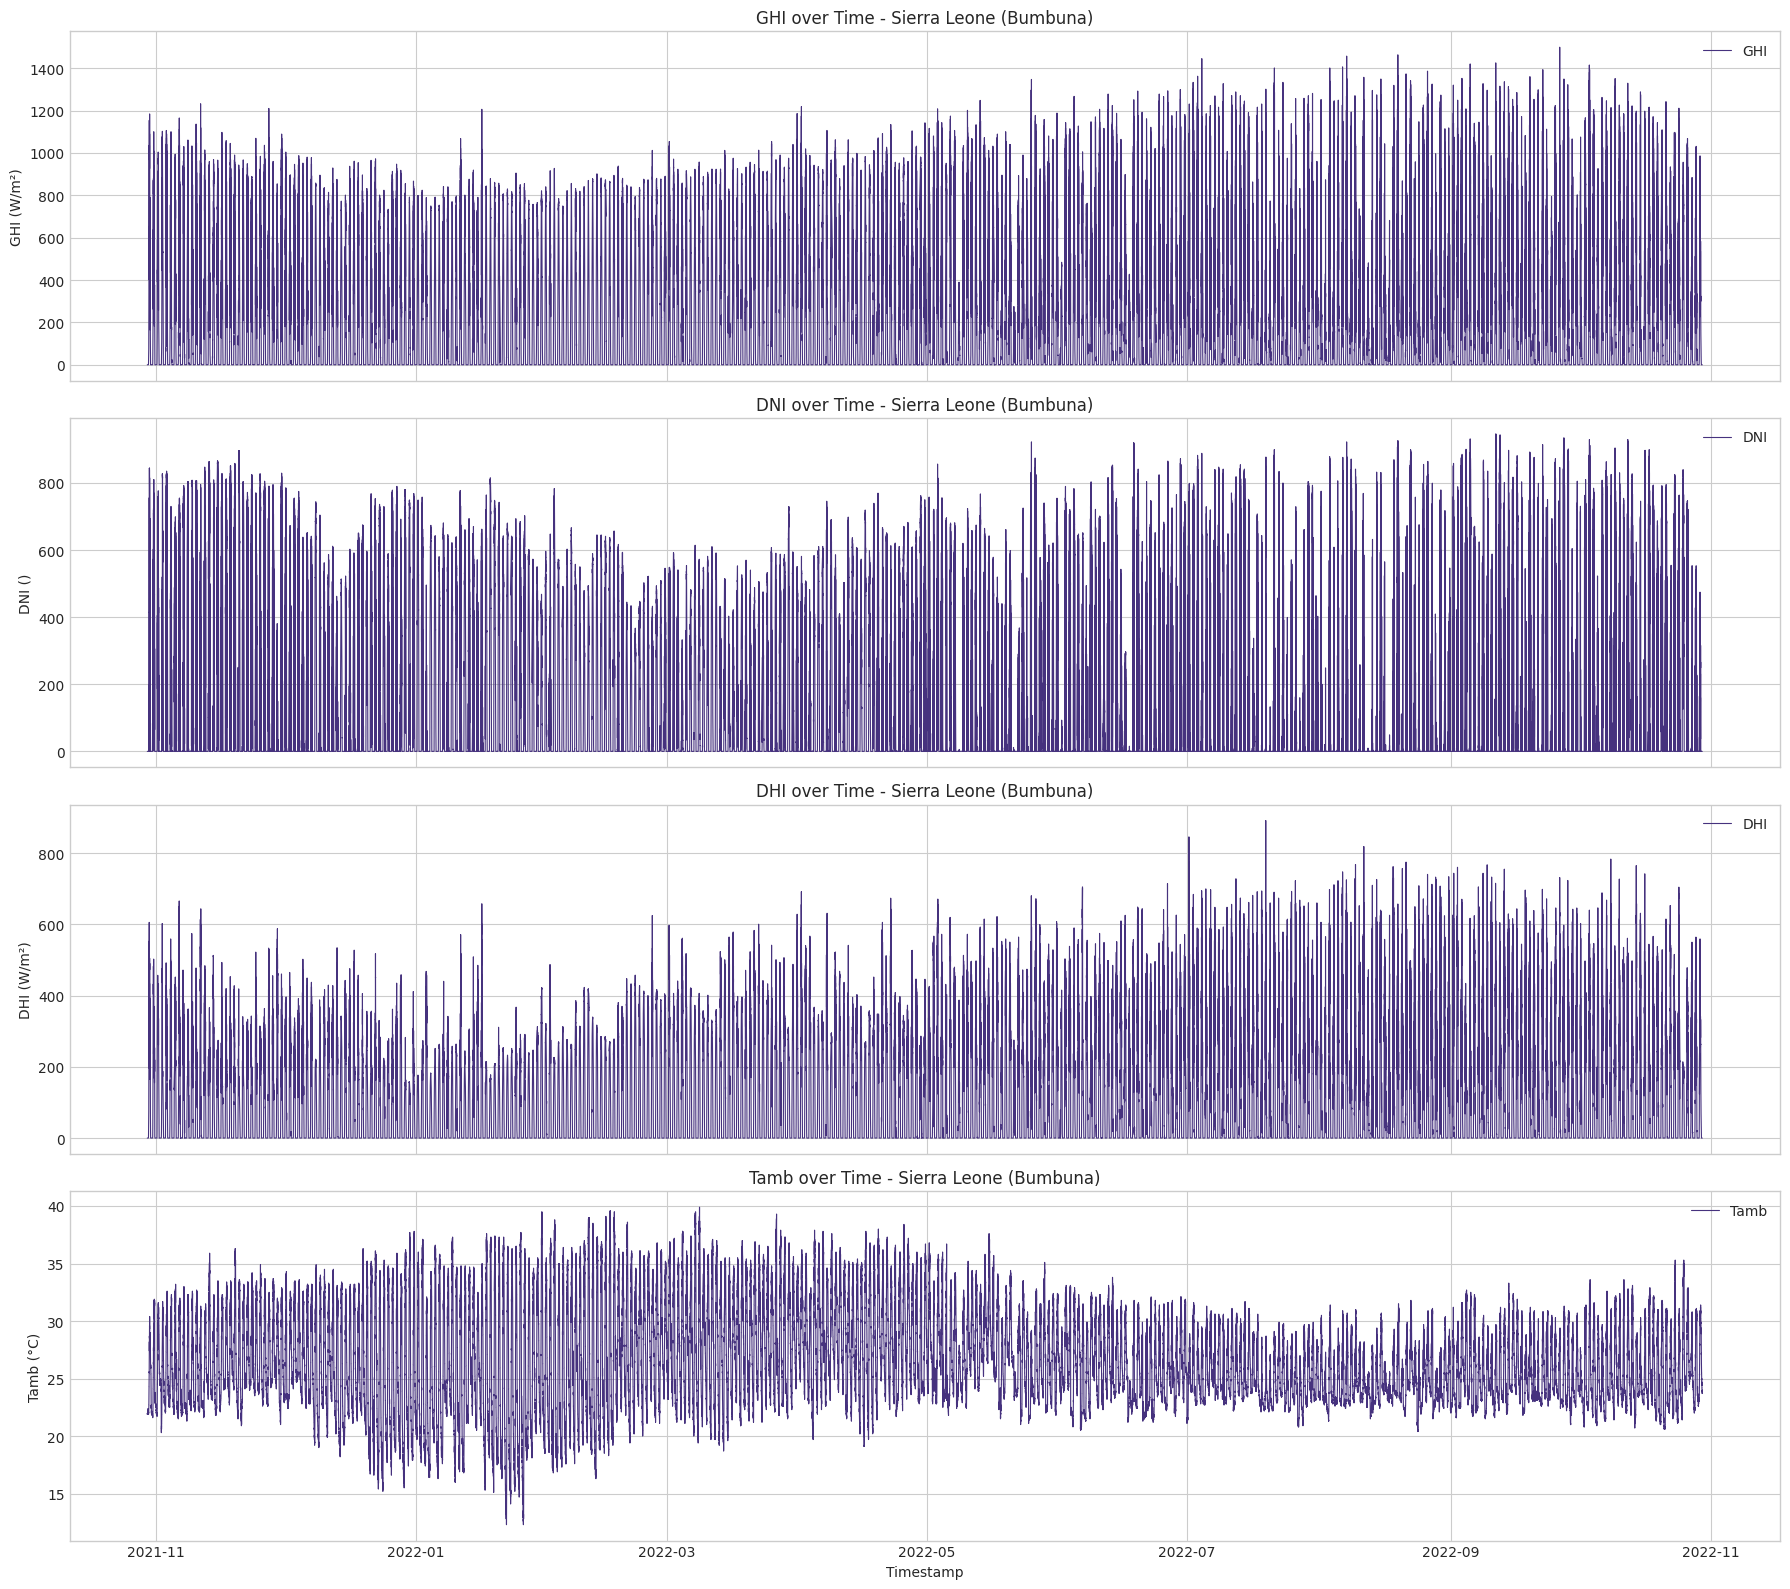


--- Average GHI by Month (Sierra Leone - Bumbuna) ---


/tmp/ipykernel_73585/3533668913.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_ghi_sl = df_plot_sl['GHI'].resample('M').mean()


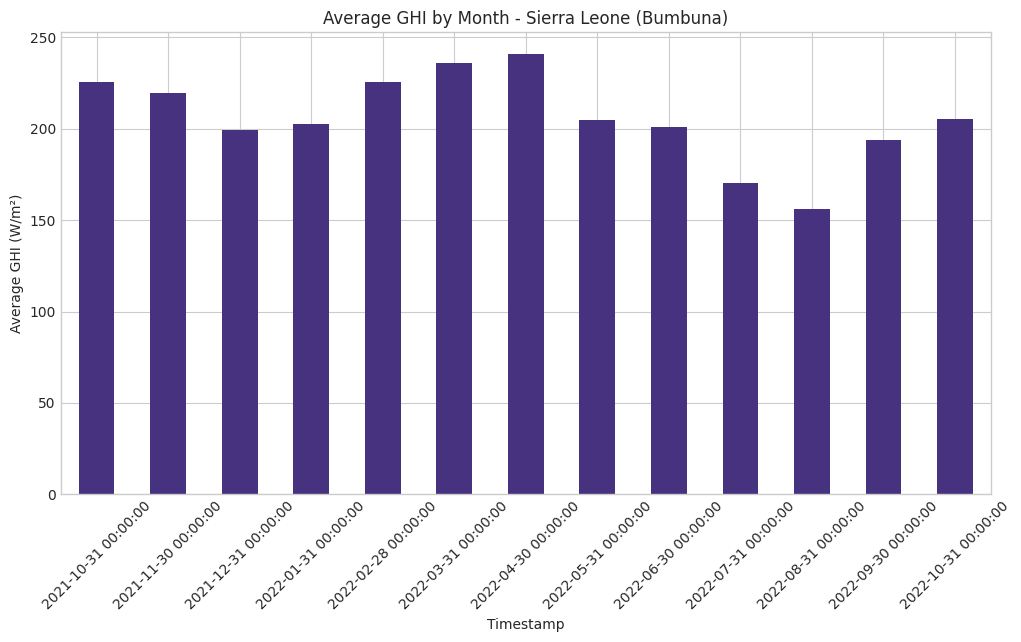


--- Average GHI by Hour of Day (Sierra Leone - Bumbuna) ---


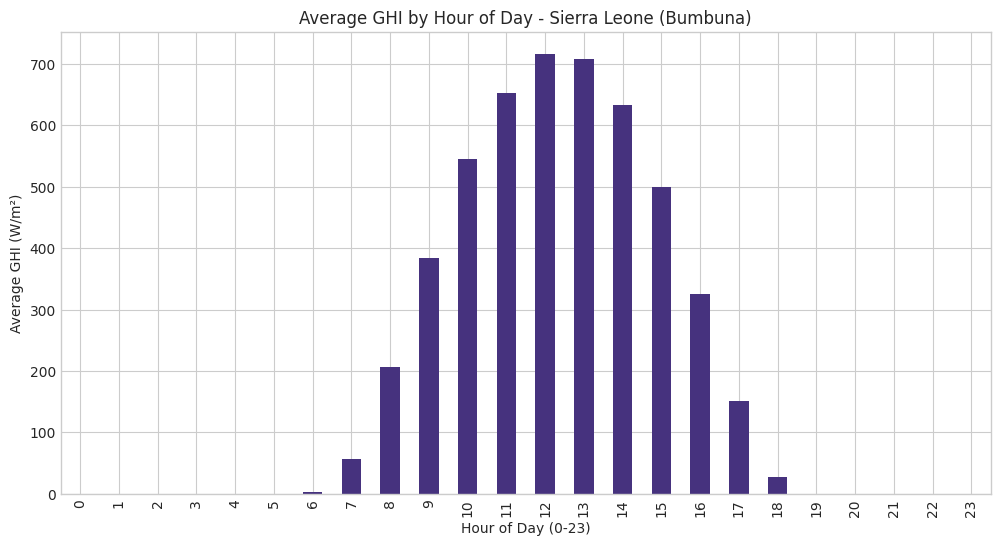

In [10]:
if df_plot_sl is not None and isinstance(df_plot_sl.index, pd.DatetimeIndex):
    print("--- Time Series Plots (Sierra Leone - Bumbuna) ---")
    cols_to_plot_ts_sl = ['GHI', 'DNI', 'DHI', 'Tamb']
    valid_cols_ts_sl = [col for col in cols_to_plot_ts_sl if col in df_plot_sl.columns]
    
    if valid_cols_ts_sl:
        num_plots = len(valid_cols_ts_sl)
        fig, axes = plt.subplots(num_plots, 1, figsize=(18, 4 * num_plots), sharex=True)
        if num_plots == 1: axes = [axes]
        for i, col in enumerate(valid_cols_ts_sl):
            sns.lineplot(data=df_plot_sl, x=df_plot_sl.index, y=col, ax=axes[i], label=col, errorbar=None, linewidth=0.8)
            axes[i].set_ylabel(f"{col} ({'W/m²' if 'HI' in col else '°C' if 'Tamb' in col else ''})")
            axes[i].set_title(f"{col} over Time - Sierra Leone (Bumbuna)")
            axes[i].legend()
        plt.xlabel("Timestamp")
        plt.tight_layout()
        plt.show()
    else:
        print(f"None of the specified columns for time series plotting ({cols_to_plot_ts_sl}) are available in Sierra Leone data.")

    if 'GHI' in df_plot_sl.columns and df_plot_sl.index.month.nunique() > 1:
        print("\n--- Average GHI by Month (Sierra Leone - Bumbuna) ---")
        monthly_avg_ghi_sl = df_plot_sl['GHI'].resample('M').mean()
        if not monthly_avg_ghi_sl.empty:
            monthly_avg_ghi_sl.plot(kind='bar', figsize=(12, 6))
            plt.title("Average GHI by Month - Sierra Leone (Bumbuna)")
            plt.ylabel("Average GHI (W/m²)")
            plt.xticks(rotation=45)
            plt.show()
    
    if 'GHI' in df_plot_sl.columns:
        print("\n--- Average GHI by Hour of Day (Sierra Leone - Bumbuna) ---")
        hourly_avg_ghi_sl = df_plot_sl.groupby(df_plot_sl.index.hour)['GHI'].mean()
        if not hourly_avg_ghi_sl.empty:
            hourly_avg_ghi_sl.plot(kind='bar', figsize=(12, 6))
            plt.title("Average GHI by Hour of Day - Sierra Leone (Bumbuna)")
            plt.xlabel("Hour of Day (0-23)")
            plt.ylabel("Average GHI (W/m²)")
            plt.show()
else:
    print("Plotting DataFrame for Sierra Leone (df_plot_sl) not available or Timestamp index not set correctly. Skipping Time Series Analysis.")

### 6.2. Cleaning Impact (Sierra Leone)

--- Average Module Readings by Cleaning Status (Sierra Leone - Bumbuna) ---


,ModA,ModB
Cleaning,,
0,206.578586,198.038150
1,273.309252,277.231102


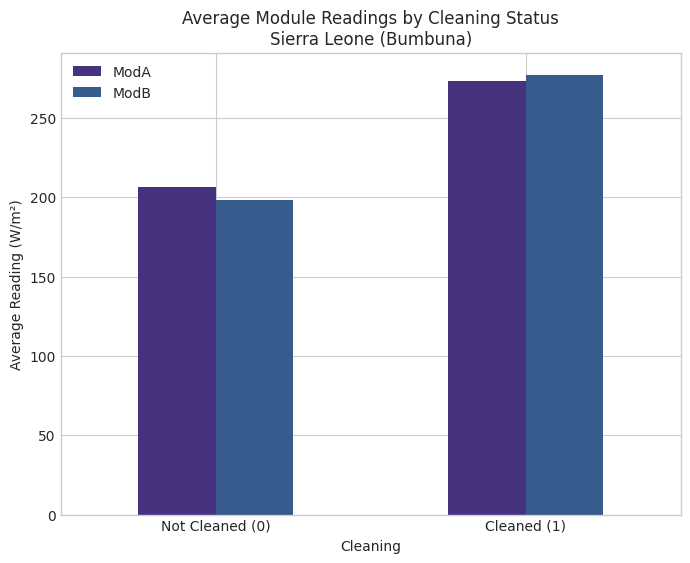

In [11]:
if df_plot_sl is not None and 'Cleaning' in df_plot_sl.columns and 'ModA' in df_plot_sl.columns and 'ModB' in df_plot_sl.columns:
    if df_plot_sl['Cleaning'].nunique() > 1 and df_plot_sl['Cleaning'].notna().all():
        cleaning_impact_sl = df_plot_sl.groupby('Cleaning')[['ModA', 'ModB']].mean()
        print("--- Average Module Readings by Cleaning Status (Sierra Leone - Bumbuna) ---")
        display(cleaning_impact_sl)
        if not cleaning_impact_sl.empty:
            cleaning_impact_sl.plot(kind='bar', figsize=(8, 6))
            plt.title("Average Module Readings by Cleaning Status\nSierra Leone (Bumbuna)")
            plt.ylabel("Average Reading (W/m²)")
            plt.xticks(ticks=[0, 1], labels=['Not Cleaned (0)', 'Cleaned (1)'], rotation=0)
            plt.show()
    elif df_plot_sl['Cleaning'].nunique() <=1:
         print(f"Not enough distinct 'Cleaning' events (0 and 1) to show impact for Sierra Leone. Unique values: {df_plot_sl['Cleaning'].unique()}")
    else:
        print("'Cleaning' column (Sierra Leone) might contain NaNs.")
else:
    print("df_plot_sl, 'Cleaning', 'ModA', or 'ModB' column not available for Sierra Leone. Skipping Cleaning Impact analysis.")

### 6.3. Correlation & Relationship Analysis (Sierra Leone)
#### 6.3.1. Correlation Heatmap

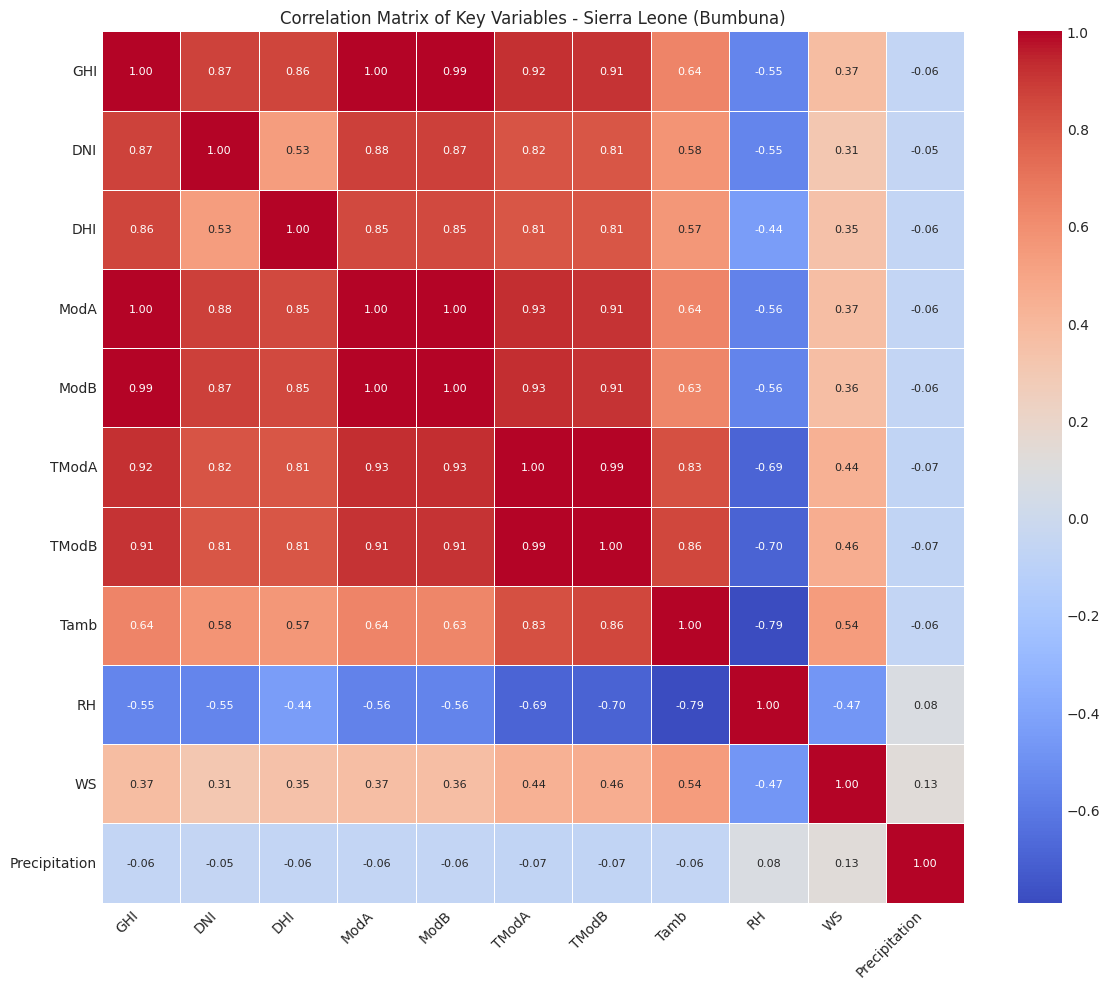

In [12]:
if df_plot_sl is not None:
    correlation_cols_sl = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'Precipitation']
    valid_correlation_cols_sl = [col for col in correlation_cols_sl if col in df_plot_sl.columns and pd.api.types.is_numeric_dtype(df_plot_sl[col])]
    if len(valid_correlation_cols_sl) > 1:
        plt.figure(figsize=(12, 10))
        correlation_matrix_sl = df_plot_sl[valid_correlation_cols_sl].corr()
        sns.heatmap(correlation_matrix_sl, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
        plt.title("Correlation Matrix of Key Variables - Sierra Leone (Bumbuna)")
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough valid numeric columns for correlation matrix in Sierra Leone data. Found: {valid_correlation_cols_sl}")
else:
    print("df_plot_sl not available. Skipping Correlation Heatmap for Sierra Leone.")

 #### 6.3.2. Scatter Plots (Sierra Leone)

--- Scatter Plots (Sierra Leone - Bumbuna) ---


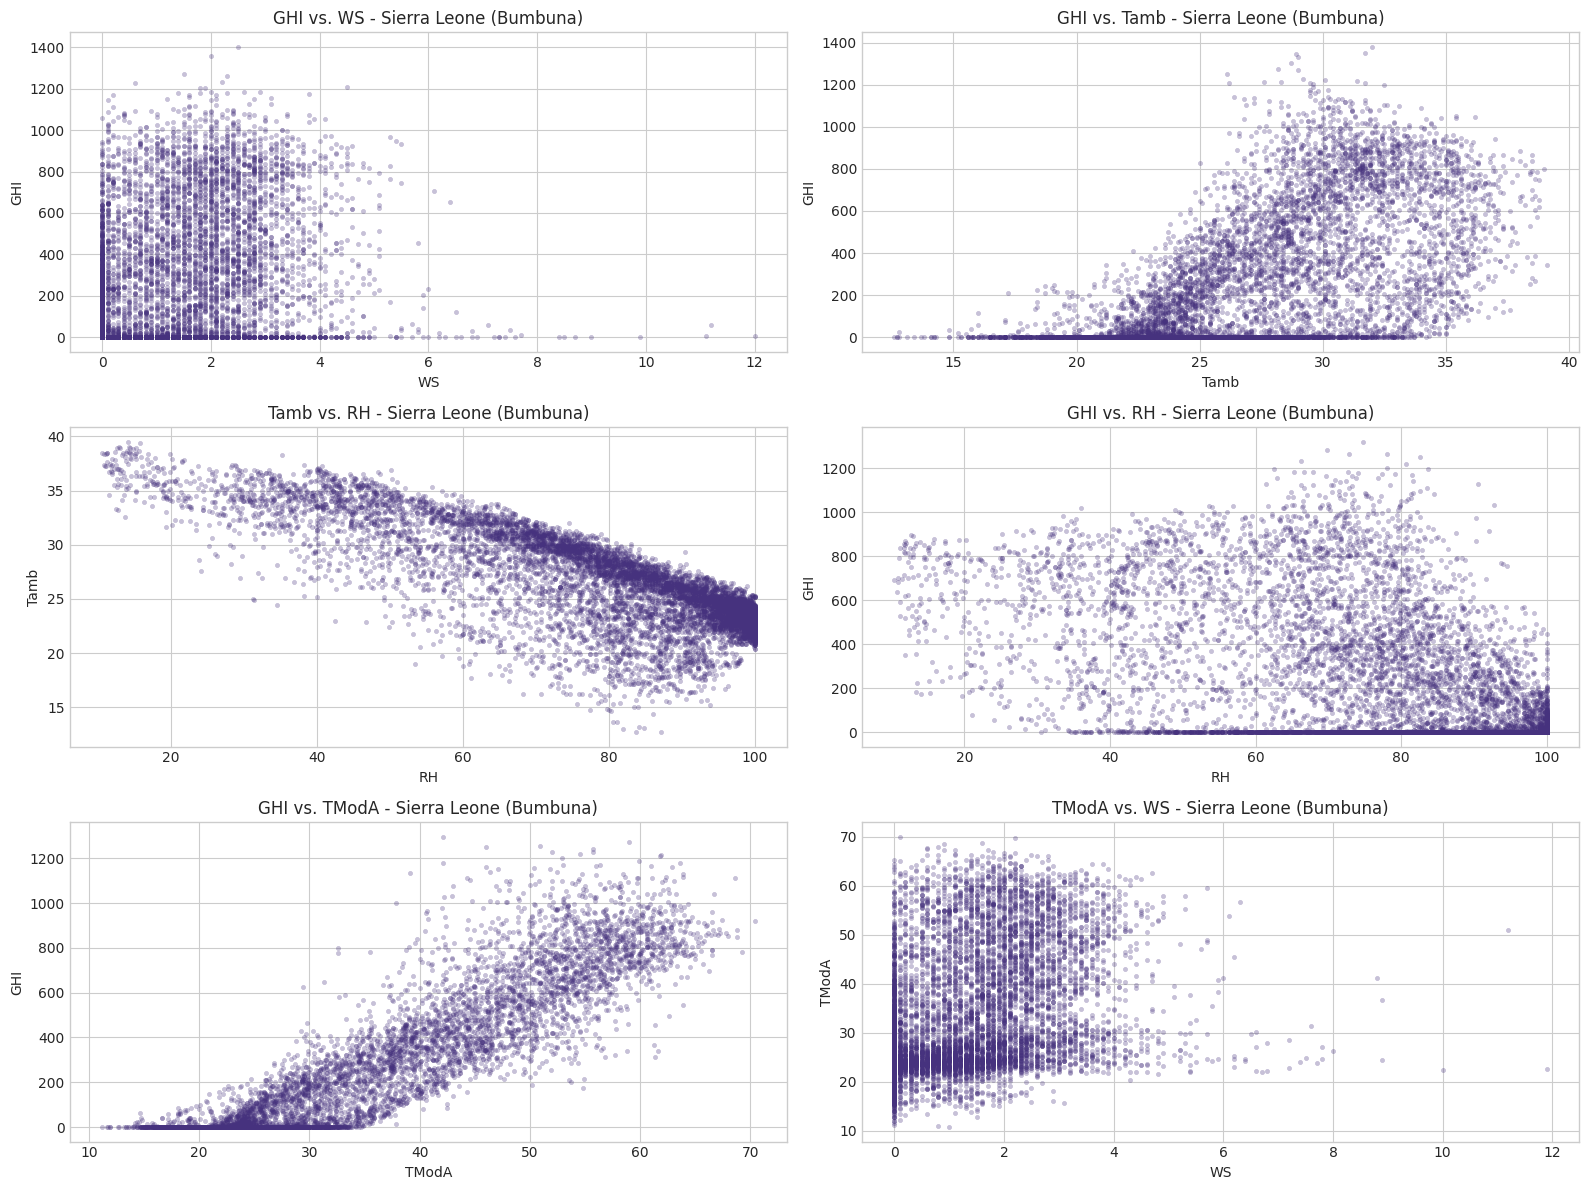

In [13]:
if df_plot_sl is not None:
    print("--- Scatter Plots (Sierra Leone - Bumbuna) ---")
    scatter_pairs_sl = [('WS', 'GHI'), ('Tamb', 'GHI'), ('RH', 'Tamb'), ('RH', 'GHI'), ('TModA', 'GHI'), ('WS', 'TModA')]
    valid_scatter_pairs_sl = []
    for x_col, y_col in scatter_pairs_sl:
        if x_col in df_plot_sl.columns and y_col in df_plot_sl.columns:
            valid_scatter_pairs_sl.append((x_col,y_col))
        else:
            print(f"Skipping scatter plot (SL): Columns for {x_col} vs {y_col} not fully available.")

    if valid_scatter_pairs_sl:
        num_valid_plots = len(valid_scatter_pairs_sl)
        fig, axes = plt.subplots(nrows=(num_valid_plots + 1) // 2, ncols=2, figsize=(16, 4 * ((num_valid_plots + 1) // 2)))
        axes = axes.flatten()
        for i, (x_col, y_col) in enumerate(valid_scatter_pairs_sl):
            sample_df_sl = df_plot_sl if len(df_plot_sl) < 10000 else df_plot_sl.sample(10000)
            sns.scatterplot(data=sample_df_sl, x=x_col, y=y_col, ax=axes[i], alpha=0.3, s=10, edgecolor=None)
            axes[i].set_title(f"{y_col} vs. {x_col} - Sierra Leone (Bumbuna)")
        if num_valid_plots % 2 != 0 and num_valid_plots > 0 :
            if num_valid_plots < len(axes): fig.delaxes(axes[num_valid_plots])
        plt.tight_layout()
        plt.show()
else:
    print("df_plot_sl not available. Skipping Scatter Plots for Sierra Leone.")

### 6.4. Wind & Distribution Analysis (Sierra Leone)
#### 6.4.1. Wind Rose (WS/WD)

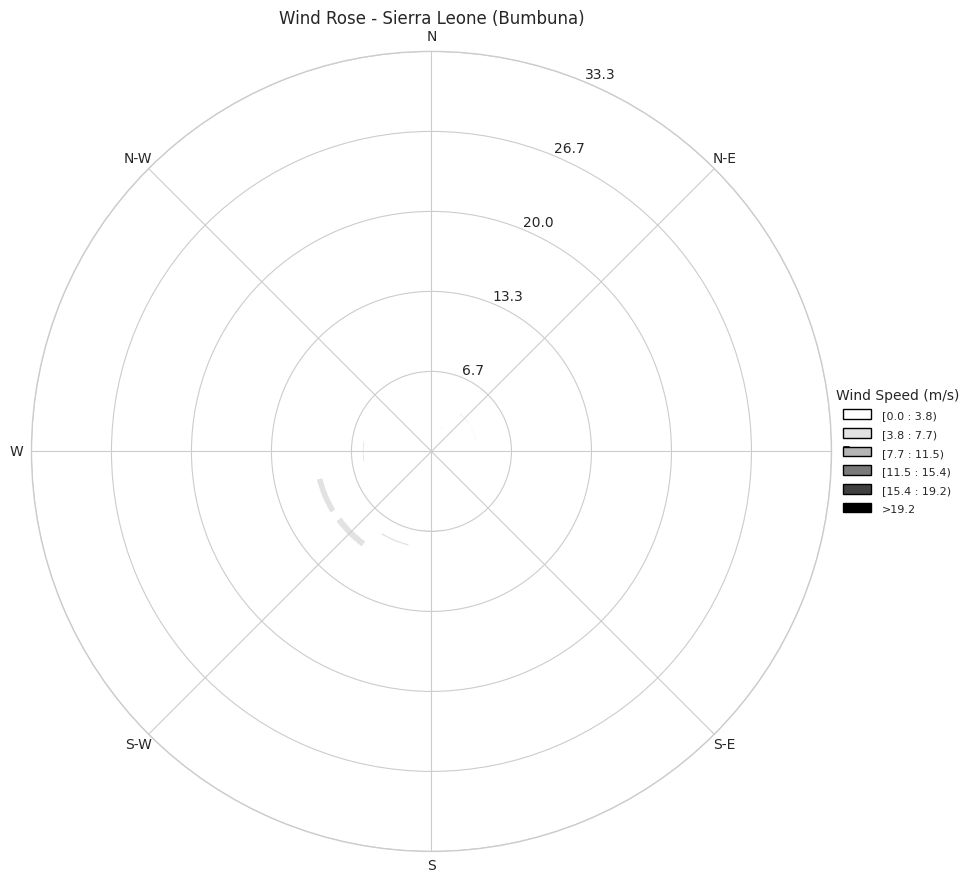

In [14]:
try:
    from windrose import WindroseAxes
except ImportError:
    print("Windrose library not installed. Skipping wind rose plot. Install with: pip install windrose")
    WindroseAxes = None

if df_plot_sl is not None and WindroseAxes is not None:
    if 'WS' in df_plot_sl.columns and 'WD' in df_plot_sl.columns:
        ws_wd_data_sl = df_plot_sl[['WS', 'WD']].dropna()
        if not ws_wd_data_sl.empty and len(ws_wd_data_sl['WD'].unique()) > 1:
            fig = plt.figure(figsize=(10, 10))
            ax = WindroseAxes.from_ax(fig=fig)
            ax.bar(ws_wd_data_sl['WD'], ws_wd_data_sl['WS'], normed=True, opening=0.8, edgecolor='white', nsector=16)
            ax.set_legend(title="Wind Speed (m/s)", loc='center left', bbox_to_anchor=(1, 0.5))
            plt.title("Wind Rose - Sierra Leone (Bumbuna)", pad=20)
            plt.show()
        elif ws_wd_data_sl.empty : print("No valid WS/WD data for Sierra Leone wind rose plot.")
        else: print("Not enough variation in Wind Direction for Sierra Leone wind rose plot.")
    else: print("WS or WD column not found in Sierra Leone data. Skipping wind rose plot.")
elif WindroseAxes is None and df_plot_sl is not None: pass
else: print("df_plot_sl not available. Skipping Wind Rose for Sierra Leone.")


#### 6.4.2. Histograms (Sierra Leone)

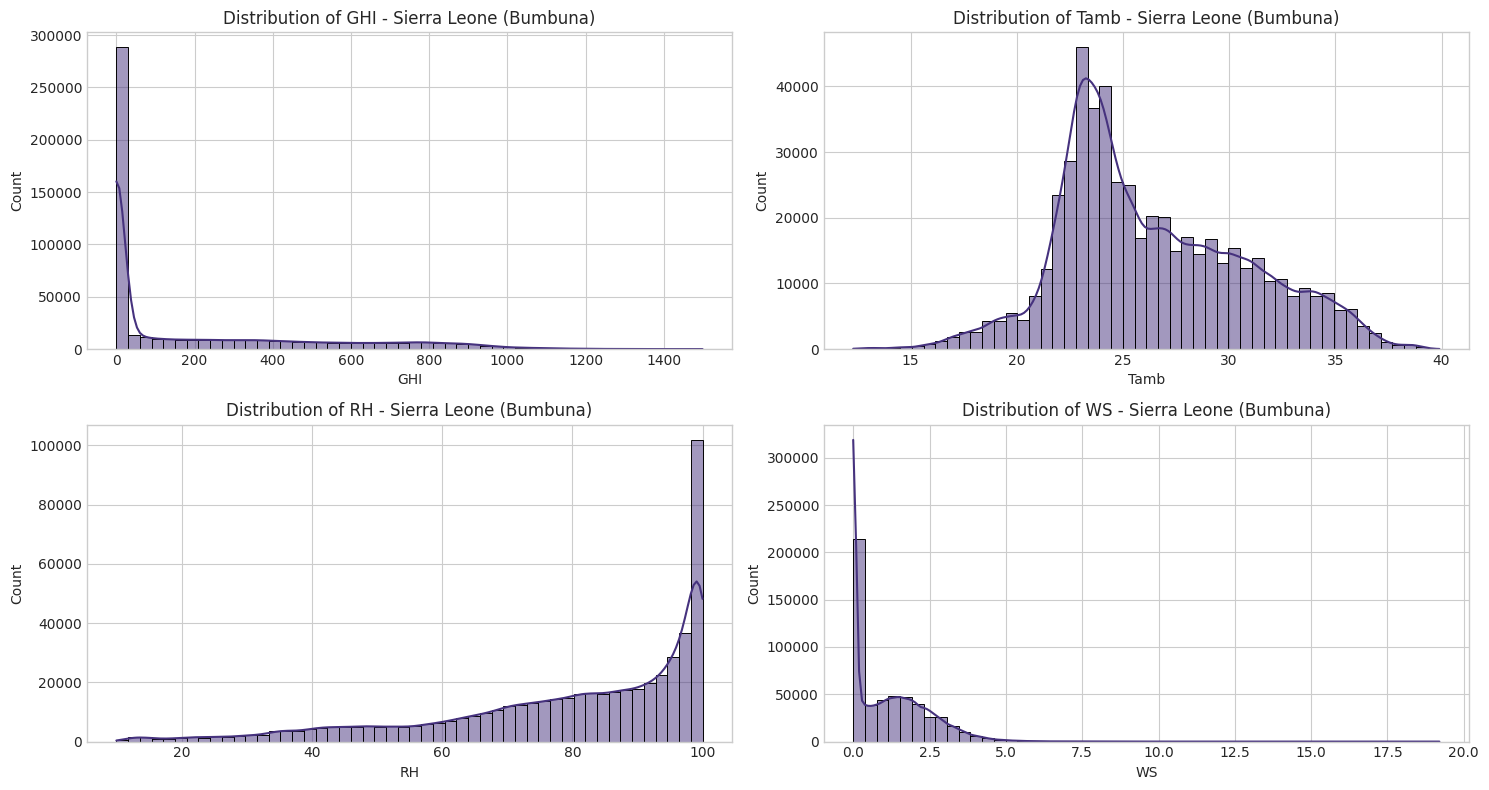

In [15]:
if df_plot_sl is not None:
    hist_cols_sl = ['GHI', 'Tamb', 'RH', 'WS']
    valid_hist_cols_sl = [col for col in hist_cols_sl if col in df_plot_sl.columns]
    if valid_hist_cols_sl:
        num_hist_plots = len(valid_hist_cols_sl)
        fig, axes = plt.subplots( (num_hist_plots + 1)//2, 2, figsize=(15, 4 * ((num_hist_plots + 1)//2) ))
        axes = axes.flatten()
        for i, col in enumerate(valid_hist_cols_sl):
            sns.histplot(df_plot_sl[col], kde=True, ax=axes[i], bins=50)
            axes[i].set_title(f"Distribution of {col} - Sierra Leone (Bumbuna)")
        if num_hist_plots % 2 != 0 and num_hist_plots > 0 :
             if num_hist_plots < len(axes): fig.delaxes(axes[num_hist_plots])
        plt.tight_layout()
        plt.show()
else:
    print("df_plot_sl not available. Skipping Histograms for Sierra Leone.")

### 6.5. Temperature Analysis (Sierra Leone)

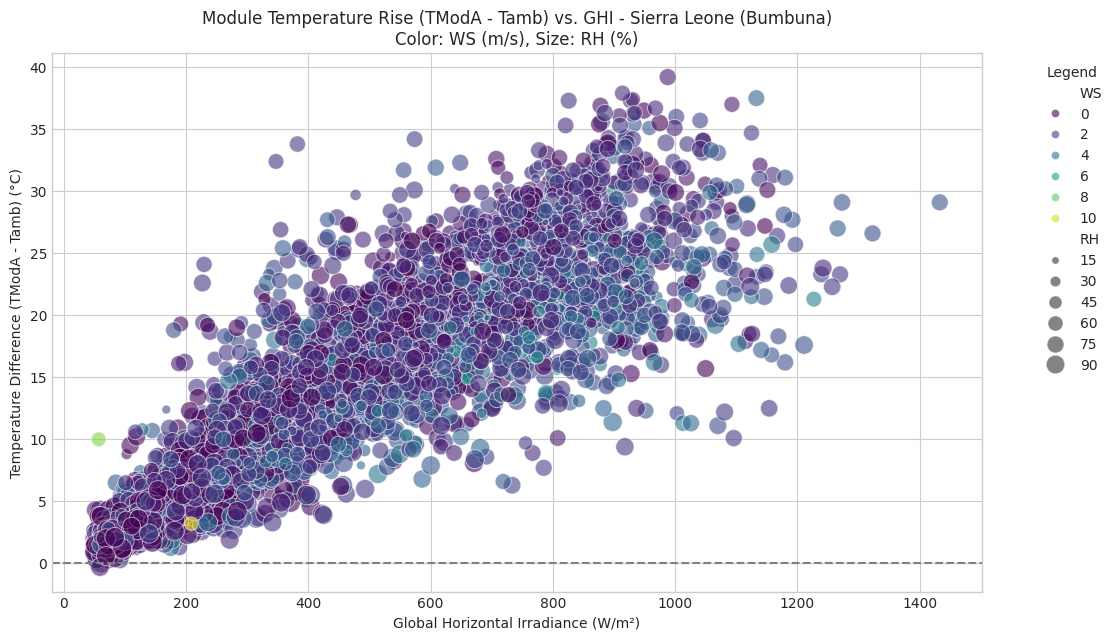

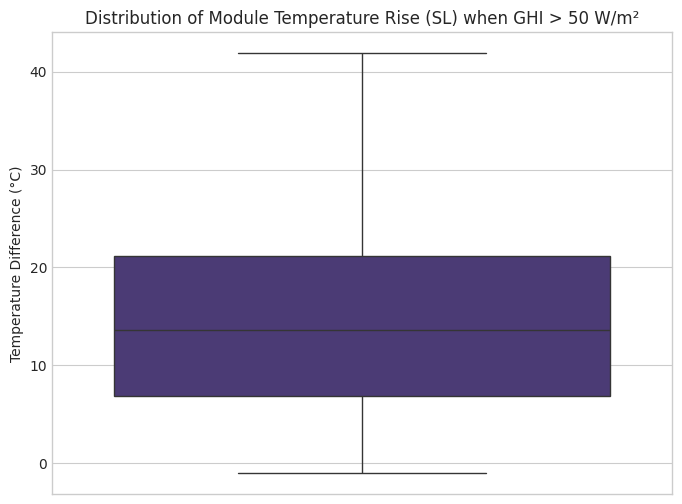


Descriptive statistics for TModA - Tamb (SL, GHI > 50 W/m²):


count    227705.000000
mean         14.329192
std           8.594108
min          -1.000000
25%           6.900000
50%          13.600000
75%          21.200000
max          41.900000
Name: T_Diff_ModA_Amb, dtype: float64

In [16]:
if df_plot_sl is not None and 'TModA' in df_plot_sl.columns and 'Tamb' in df_plot_sl.columns and 'GHI' in df_plot_sl.columns:
    df_plot_sl['T_Diff_ModA_Amb'] = df_plot_sl['TModA'] - df_plot_sl['Tamb']
    plt.figure(figsize=(12, 7))
    sample_df_temp_sl = df_plot_sl if len(df_plot_sl) < 10000 else df_plot_sl.sample(10000)
    sns.scatterplot(data=sample_df_temp_sl[sample_df_temp_sl['GHI'] > 50], 
                    x='GHI', y='T_Diff_ModA_Amb', hue='WS', size='RH', sizes=(20,200),
                    palette='viridis', alpha=0.6)
    plt.title('Module Temperature Rise (TModA - Tamb) vs. GHI - Sierra Leone (Bumbuna)\nColor: WS (m/s), Size: RH (%)')
    plt.xlabel('Global Horizontal Irradiance (W/m²)')
    plt.ylabel('Temperature Difference (TModA - Tamb) (°C)')
    plt.axhline(0, color='grey', linestyle='--'); plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left'); plt.grid(True); plt.show()

    plt.figure(figsize=(8,6))
    sns.boxplot(y=df_plot_sl[df_plot_sl['GHI'] > 50]['T_Diff_ModA_Amb'])
    plt.title('Distribution of Module Temperature Rise (SL) when GHI > 50 W/m²')
    plt.ylabel('Temperature Difference (°C)'); plt.show()
    
    print("\nDescriptive statistics for TModA - Tamb (SL, GHI > 50 W/m²):")
    display(df_plot_sl[df_plot_sl['GHI'] > 50]['T_Diff_ModA_Amb'].describe())
else:
    print("TModA, Tamb, or GHI column not available for detailed temperature analysis in Sierra Leone data.")


### 6.6. Bubble Chart (Sierra Leone)

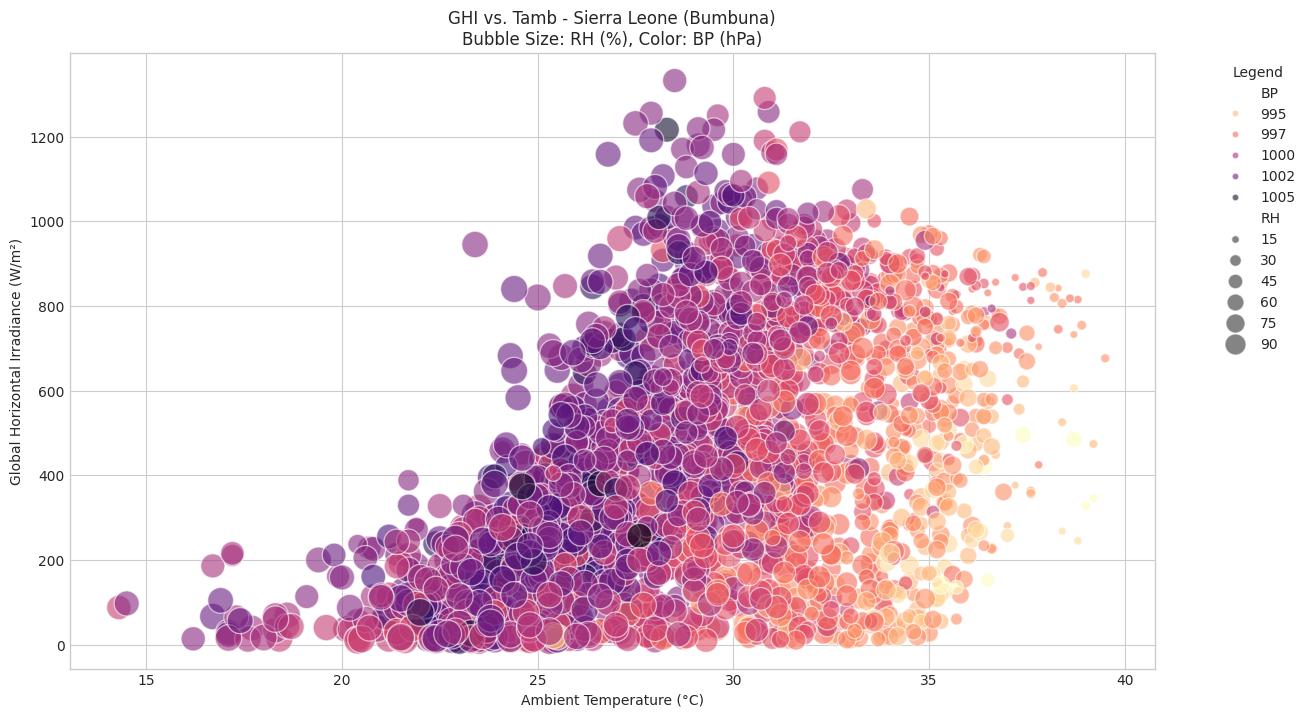

In [17]:
if df_plot_sl is not None:
    bubble_chart_cols_sl = ['GHI', 'Tamb', 'RH', 'BP']
    if all(col in df_plot_sl.columns for col in bubble_chart_cols_sl):
        plt.figure(figsize=(14, 8))
        sample_df_bubble_sl = df_plot_sl if len(df_plot_sl) < 5000 else df_plot_sl.sample(5000)
        sns.scatterplot(data=sample_df_bubble_sl[sample_df_bubble_sl['GHI'] > 10], 
                        x='Tamb', y='GHI', size='RH', hue='BP', sizes=(30, 400), alpha=0.6, palette="magma_r")
        plt.title("GHI vs. Tamb - Sierra Leone (Bumbuna)\nBubble Size: RH (%), Color: BP (hPa)")
        plt.xlabel("Ambient Temperature (°C)"); plt.ylabel("Global Horizontal Irradiance (W/m²)")
        plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=0.8); plt.grid(True); plt.show()
    else:
        missing_bubble_cols_sl = [col for col in bubble_chart_cols_sl if col not in df_plot_sl.columns]
        print(f"One or more columns ({missing_bubble_cols_sl}) not found for Sierra Leone bubble chart.")
else:
    print("df_plot_sl not available. Skipping Bubble Chart for Sierra Leone.")

In [18]:
print("Sierra Leone (Bumbuna) EDA notebook execution complete.")


Sierra Leone (Bumbuna) EDA notebook execution complete.
